## Review

Hi Jaylen. This is Soslan. I'm reviewing your third work. I've added all my comments to new cells with different coloring.

<div class="alert alert-success" role="alert">
  If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
  If the topic requires some extra work so I can accept it then the color will be red
</div>


Your project is of good quality. All the checkpoints were done correctly. I'm not agree with you only in selecting of year range. Anyway I'm accepting the project by the first iteration. Thank you for your work and good luck in future learning.


# Ice 2016 Sales Analysis

## 1. Open the data file and study the general information.

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/games.csv')
print(df.head())
print(df.info())
print(df.describe())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

I opened the dataset and saved the original dataframe to the df variable. I print the first five rows using the head method, the information using the info method, and the quantitative data description using the describe method to get a general picture of the data and determine what preprocessing needs to be done.

<div class="alert alert-success" role="alert">
  Good start!
</div>

## 2. Prepare the data.

In [3]:
df.columns = df.columns.str.lower()
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)
df['critic_score'] = df['critic_score'].fillna(-2)
#A value of -2 = no rating
df['user_score'] = df['user_score'].fillna(-2).replace('tbd', -1).astype(float)
#A value of -1 = rating tbd
df['rating'] = df['rating'].fillna('NR')
#A value of NR mean there is no rating availible
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df = df.dropna()
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
total_sales        16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB
None
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3 

First, to make all the column headers lowercase I applied the .str and .lower functions to the columns of the dataframe. Then, for the year of release i filled the null values with a zero to represent that there is no year available for the title, if I need to filter those values out I can set a condition that the year is greater than zero. For the critic score and user score I filled null values with a -2 and replace tbd with a -1 this way I have a representtive value that I can easily filter out. Both score columns were converted to float data type so that scores can be arithmetically manipulated. The null values in the rating column were replaced with "NR" as a representation that the ESRB rating is not availible. I created a column with the total sales by adding up all the values from each of the regions. Lastly i dropped the remaining NA rows because it only affected 2 rows of data and would not significantly affect the final calculations.

<div class="alert alert-success" role="alert">
  Nice work with missed values and data types.
</div>

<div class="alert alert-warning" role="alert">
  Maybe some of the missed values in `year_of_release` you could restore from name of the game
</div>

## 3. Analyze the data.

### Games released in different years.

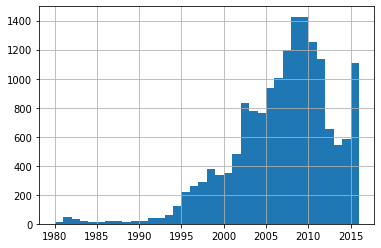

In [7]:
release_years = df['year_of_release'][df['year_of_release'] > 0]
release_years.hist(bins=36)

This data shows a drastic difference between present day games and the games of the early 80's. This is most likley due to advancements in technology and the abillity to have these systems in your home. There was a peak of games being release between the approximately years of 2006 and 2012, this is probably related to the release of the Xbox 360, the Playstation 3, and the Wii which were all released around this time.

### Top Five Platform Sales

In [8]:
platform_sales = df.pivot_table(index='platform', values='total_sales', aggfunc=sum)
platform_sales.sort_values(by='total_sales', ascending=False).head()

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


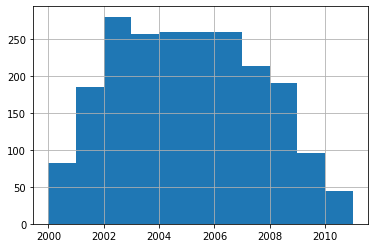

In [9]:
import matplotlib.pyplot as plt
ps2_sales = df.query('platform == "PS2" & year_of_release > 0')
ps2_sales['year_of_release'].hist(bins=11)

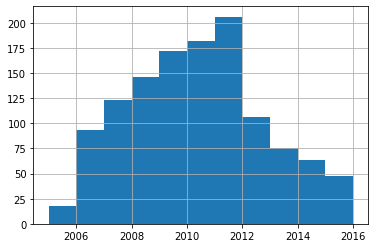

In [10]:
x360_sales = df.query('platform == "X360" & year_of_release > 0')
x360_sales['year_of_release'].hist(bins=11)

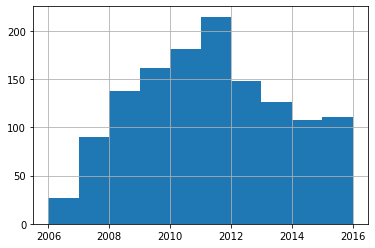

In [11]:
PS3_sales = df.query('platform == "PS3" & year_of_release > 0')
PS3_sales['year_of_release'].hist()

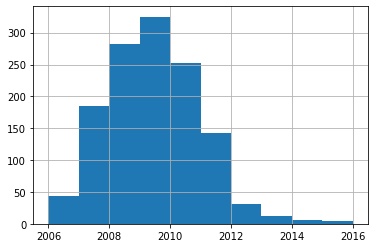

In [12]:
wii_sales = df.query('platform == "Wii" & year_of_release > 0')
wii_sales['year_of_release'].hist()

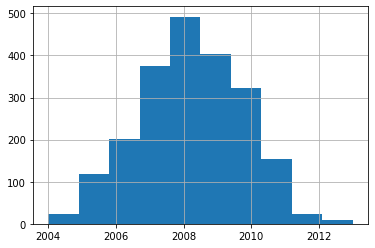

In [13]:
ds_sales = df.query('platform == "DS" & year_of_release > 2000')
ds_sales['year_of_release'].hist()

I plotted histograms for the release dates of the top 5 platforms in terms of sales. I found that the life-span of the platforms usually last around 10 years. There is a intersection with the height of popularity of a platform and the fall of its predecessor. This means that when new platform are released it marks the phase-out of the previous platform. Therefore to predict profitabillity in 2017 we should select a range of comparable years from the previous systems cycle of sales. I have chosen to narrow the data to 2007 to 2010 this way we can see a rise in data and be able to predict the peak of our sales.

<div class="alert alert-warning" role="alert">
I think trying to build a prognosis for 2017 without data of several last years before that year is a very brave idea :) But it is better to use all known data which is close to the time we want to predict. We cannot be sure that sales develop cyclically, but even then it is not the correct decision.
    
    
For the first year 2007 is OK but for the last year better to take 2016.
</div>

### Sales From 2007 - 2010

In [19]:
sales_07_10 = df.query('2007 <= year_of_release <= 2010')
platform_sales_07_10 = sales_07_10.pivot_table(index='platform', values='total_sales', aggfunc=sum)
platform_sales_07_10.sort_values(by='total_sales', ascending=False).head()

,total_sales
platform,
Wii,659.01
X360,520.99
DS,496.81
PS3,464.81
PS2,161.93


Xbox 360 sales for 2007-2010 (in USD millions)
Median sales 0.31


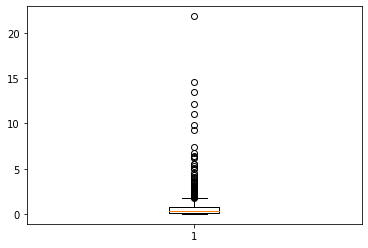

In [20]:
x360_sales_07_10 = sales_07_10.query('platform == "X360"')
plt.boxplot(x360_sales_07_10['total_sales'])
print('Xbox 360 sales for 2007-2010 (in USD millions)')
print('Median sales', x360_sales_07_10['total_sales'].median())

Playstation 3 sales for 2007-2010 (in USD millions)
Median sales 0.38


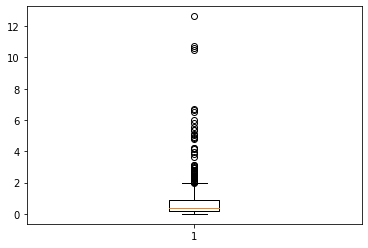

In [21]:
ps3_sales_07_10 = sales_07_10.query('platform == "PS3"')
plt.boxplot(ps3_sales_07_10['total_sales'])
print('Playstation 3 sales for 2007-2010 (in USD millions)')
print('Median sales', ps3_sales_07_10['total_sales'].median())

Wii sales for 2007-2010 (in USD millions)
Median sales 0.2


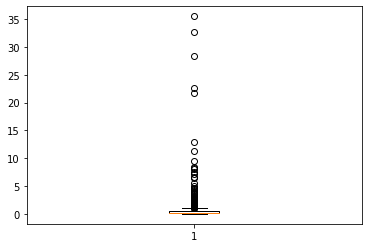

In [22]:
wii_sales_07_10 = sales_07_10.query('platform == "Wii"')
plt.boxplot(wii_sales_07_10['total_sales'])
print('Wii sales for 2007-2010 (in USD millions)')
print('Median sales', wii_sales_07_10['total_sales'].median())

For the selected sample size i found that the best platforms to study were the Xbox 360. the Playstation 3 and the Wii. The other platforms in the top 5 of sales were the DS and the PS2. I decided not to study these because the DS has no sucessor and the PS2 is being phased out and the sales dont compare to those of the other platforms. I made box plots for the total sales of each game for each platform. Alot of the sales are made up from a few very sucessful games and alot of the majority of tha games have a fraction of the sales of these games. As you can see by the medain sales for each of the platforms the typical game for xbox 360 and playstation 3 preforms better than the typical game for the wii.

<div class="alert alert-warning" role="alert">
  Here I thing it is better to build one plot with several boxes on it. It will be easier to compare then.
</div>

### Relation between score and sales

              critic_score  total_sales  user_score
critic_score      1.000000     0.394258    0.682047
total_sales       0.394258     1.000000    0.173969
user_score        0.682047     0.173969    1.000000
Xbox 360 sales and score correlation.


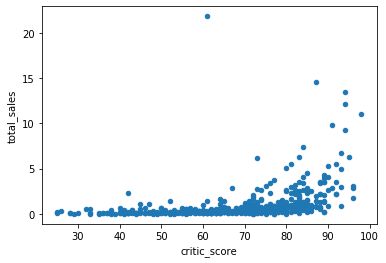

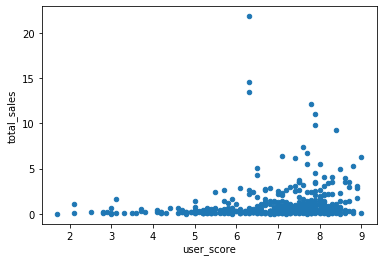

In [30]:
x360_score_and_sales = x360_sales_07_10.pivot_table(index='name', values=['critic_score', 'user_score', 'total_sales'])
x360_score_and_sales = x360_score_and_sales.query('critic_score > 0 & user_score > 0')
print(x360_score_and_sales.corr())
x360_score_and_sales.plot(x='critic_score', y='total_sales', kind='scatter')
x360_score_and_sales.plot(x='user_score', y='total_sales', kind='scatter')
print('Xbox 360 sales and score correlation.')

              critic_score  total_sales  user_score
critic_score      1.000000     0.489618    0.694323
total_sales       0.489618     1.000000    0.272950
user_score        0.694323     0.272950    1.000000
Playstation 3 sales and score correlation.


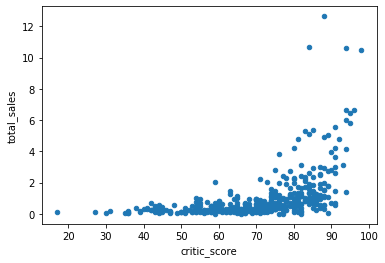

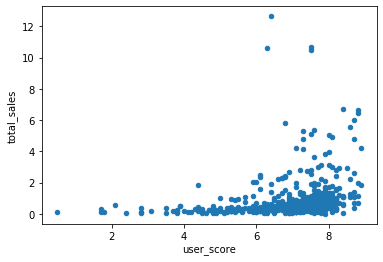

In [31]:
ps3_score_and_sales = ps3_sales_07_10.pivot_table(index='name', values=['critic_score', 'user_score','total_sales'])
ps3_score_and_sales = ps3_score_and_sales.query('critic_score > 0 & user_score > 0')
print(ps3_score_and_sales.corr())
ps3_score_and_sales.plot(x='critic_score', y='total_sales', kind='scatter')
ps3_score_and_sales.plot(x='user_score', y='total_sales', kind='scatter')
print('Playstation 3 sales and score correlation.')


              critic_score  total_sales  user_score
critic_score      1.000000     0.231259    0.713614
total_sales       0.231259     1.000000    0.138965
user_score        0.713614     0.138965    1.000000
Wii sales and score correlation.


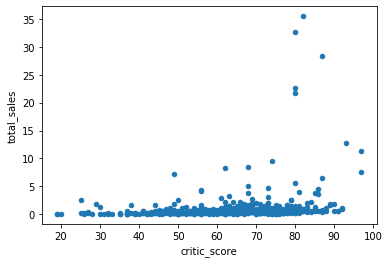

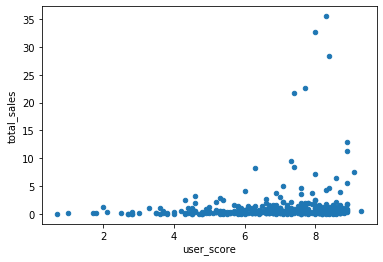

In [32]:
wii_score_and_sales = wii_sales_07_10.pivot_table(index='name', values=['critic_score', 'user_score','total_sales'])
wii_score_and_sales = wii_score_and_sales.query('critic_score > 0 & user_score > 0')
print(wii_score_and_sales.corr())
wii_score_and_sales.plot(x='critic_score', y='total_sales', kind='scatter')
wii_score_and_sales.plot(x='user_score', y='total_sales', kind='scatter')
print('Wii sales and score correlation.')

For these popular platforms i studied the relation ship between critic's score, users's score and the total sales of each game. The data shows that for platforms such as rhe Xbox and Plastation the better the professional critic scores, and  the better the game will preform in terms of sales. This is probably due to the market that each platform is geared towards. There are older individuals who depend on critic's reviews when choosing games, where as users of the Wii are usually younger and dont make decisions based on critic's score. There is a slightly higher corelation between user's score and total sales for the Playstation  than the other two platforms. This means that users of the Playstation are more codependent than users of the other platforms, and the more your current users like the game the better it will sell among that group. There are exceptions to this and those games are represented by outliers on the graph.

<div class="alert alert-warning" role="alert">
Same here, you can use different colors and opacity. If you're comparing some data and it is possible to show it in one plot, it is better to do so.
</div>

### Sales by platform.

In [26]:
x360_sales_07_10.sort_values('total_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
36,Call of Duty: Modern Warfare 2,X360,2009,Shooter,8.52,3.59,0.08,1.28,94.0,6.3,M,13.47
44,Halo 3,X360,2007,Shooter,7.97,2.81,0.13,1.21,94.0,7.8,M,12.12
51,Grand Theft Auto IV,X360,2008,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,11.00
64,Halo: Reach,X360,2010,Shooter,7.04,1.95,0.08,0.79,91.0,7.9,M,9.86
70,Call of Duty 4: Modern Warfare,X360,2007,Shooter,5.93,2.36,0.13,0.90,94.0,8.4,M,9.32
100,Call of Duty: World at War,X360,2008,Shooter,4.81,1.88,0.00,0.69,84.0,7.6,M,7.38
117,Gears of War 2,X360,2008,Shooter,4.15,1.90,0.06,0.64,93.0,7.7,M,6.75
134,Halo 3: ODST,X360,2009,Shooter,4.34,1.34,0.06,0.61,83.0,7.1,M,6.35


In [27]:
ps3_sales_07_10.sort_values('total_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70
55,Call of Duty: Modern Warfare 2,PS3,2009,Shooter,4.99,3.64,0.38,1.60,94.0,6.3,M,10.61
57,Grand Theft Auto IV,PS3,2008,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,10.50
120,Call of Duty 4: Modern Warfare,PS3,2007,Shooter,3.11,2.26,0.28,1.03,94.0,8.4,M,6.68
121,Uncharted 2: Among Thieves,PS3,2009,Action,3.27,2.20,0.21,0.98,96.0,8.8,T,6.66
125,Red Dead Redemption,PS3,2010,Action,2.79,2.53,0.17,0.99,95.0,8.8,M,6.48
147,Metal Gear Solid 4: Guns of the Patriots,PS3,2008,Action,2.63,1.71,0.83,0.82,94.0,8.7,M,5.99
150,LittleBigPlanet,PS3,2008,Platform,2.80,1.98,0.17,0.87,95.0,6.8,E,5.82
159,Assassin's Creed II,PS3,2009,Action,2.54,1.93,0.21,0.86,91.0,8.6,M,5.54


In [28]:
wii_sales_07_10.sort_values('total_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
39,Super Smash Bros. Brawl,Wii,2008,Fighting,6.62,2.55,2.66,1.01,93.0,8.9,T,12.84
49,Super Mario Galaxy,Wii,2007,Platform,6.06,3.35,1.20,0.74,97.0,8.9,E,11.35
68,Just Dance 2,Wii,2010,Misc,5.80,2.85,0.01,0.78,74.0,7.3,E10+,9.44
79,Wii Party,Wii,2010,Misc,1.75,3.47,2.49,0.67,68.0,7.4,E,8.38
80,Mario Party 8,Wii,2007,Misc,3.74,2.24,1.58,0.70,62.0,6.3,E,8.26


Comparing the best sellers across platforms shows a good example of the demographics each platform is geared towards. Users of the Xbox and Playstation play more games that are rated Mature than Wii users. Users of the Wii buy more games that are exclusive to the Wii platform, and developed by Nintendo because they made specifically for that platform and that demograpic. Xbox users buy more shooter games than any other genre, and Playstation users buy more action games. There are games that are popular regardless of which aystem they are on and those are the Grand Theft Auto and Call of Duty games. These games a have a loyal fanbase with a long history of making sucessful games and the reap the benefits by continually having high sales.

### Sales by genre.

In [29]:
sales_07_10.groupby('genre').sum().sort_values('total_sales', ascending=False)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
genre,,,,,,,,
Action,1865946,261.25,136.55,32.67,62.32,37773.0,3206.8,492.79
Sports,1476269,215.16,123.01,29.19,53.56,23941.0,1737.3,420.92
Misc,1546617,189.47,87.90,31.19,39.91,14146.0,476.0,348.47
Shooter,680879,155.68,82.14,5.54,32.53,18143.0,1722.5,275.89
Role-Playing,845574,91.63,40.37,70.68,16.72,16892.0,1459.5,219.40
Racing,616570,80.70,64.05,6.69,25.44,11305.0,982.6,176.88
Simulation,829499,81.82,43.90,9.29,13.86,8013.0,462.4,148.87
Platform,329361,72.86,39.75,13.86,15.30,6853.0,557.5,141.77
Fighting,399675,50.24,21.91,13.41,13.54,7235.0,617.6,99.10


The most popular genres are Action, Sports, Misc, Shooter, and Role-Playing. Genres such as Action have been around and popular since video games were developed and continue to draw players in. Genres such as Misc represent new games that have been developed and dont fit into any traditional genres or the genre they fit in are too niche to stand alone such as Just Dance which could be put into a Dance genre but would not have enough other titles to justify the distinction. There are some genres that may have crossover and could be underrepresented. For example Adventure games could be considered Action, and Racing could be considered a Simulation game. This shows that there are common themes from game to game that make them sucessful. These factors could be drama and adrenaline and could be the reason Puzzle and Strategy games dont do as well as Action games.

<div class="alert alert-success" role="alert">
Overall good section but if you're forecasting for 2011.
</div>

## 4. Create a user profile for each region.

### North America

In [34]:
na_platform_sales = sales_07_10.pivot_table(index='platform', values='na_sales', aggfunc=sum)
na_platform_sales.sort_values('na_sales', ascending=False).head()

,na_sales
platform,
Wii,367.45
X360,326.88
DS,255.12
PS3,213.03
PS2,64.83


In [35]:
na_genre_sales = sales_07_10.pivot_table(index='genre', values='na_sales', aggfunc=sum)
na_genre_sales.sort_values('na_sales', ascending=False).head()

,na_sales
genre,
Action,261.25
Sports,215.16
Misc,189.47
Shooter,155.68
Role-Playing,91.63


In [36]:
na_esrb_sales = sales_07_10.pivot_table(index='rating', values='na_sales', aggfunc=sum)
na_esrb_sales.sort_values('na_sales', ascending=False).head()

,na_sales
rating,
E,493.82
T,262.01
M,238.10
E10+,169.89
NR,130.06


### Europe

In [37]:
eu_platform_sales = sales_07_10.pivot_table(index='platform', values='eu_sales', aggfunc=sum)
eu_platform_sales.sort_values('eu_sales', ascending=False).head()

,eu_sales
platform,
Wii,185.10
PS3,156.73
X360,139.95
DS,110.68
PC,41.68


In [38]:
eu_genre_sales = sales_07_10.pivot_table(index='genre', values='eu_sales', aggfunc=sum)
eu_genre_sales.sort_values('eu_sales', ascending=False).head()

,eu_sales
genre,
Action,136.55
Sports,123.01
Misc,87.90
Shooter,82.14
Racing,64.05


In [39]:
eu_esrb_sales = sales_07_10.pivot_table(index='rating', values='eu_sales', aggfunc=sum)
eu_esrb_sales.sort_values('eu_sales', ascending=False).head()

,eu_sales
rating,
E,251.35
M,135.60
T,134.73
NR,91.89
E10+,84.75


### Japan 

In [40]:
jp_platform_sales = sales_07_10.pivot_table(index='platform', values='jp_sales', aggfunc=sum)
jp_platform_sales.sort_values('jp_sales', ascending=False).head()

,jp_sales
platform,
DS,94.89
Wii,50.16
PSP,42.20
PS3,28.94
PS2,18.20


In [41]:
jp_genre_sales = sales_07_10.pivot_table(index='genre', values='jp_sales', aggfunc=sum)
jp_genre_sales.sort_values('jp_sales', ascending=False).head()

,jp_sales
genre,
Role-Playing,70.68
Action,32.67
Misc,31.19
Sports,29.19
Adventure,14.84


In [42]:
jp_esrb_sales = sales_07_10.pivot_table(index='rating', values='jp_sales', aggfunc=sum)
jp_esrb_sales.sort_values('jp_sales', ascending=False).head()

,jp_sales
rating,
NR,106.56
E,58.38
T,41.35
E10+,20.68
M,14.95


   I found a few differences in the popular platforms for each region. It shows the pc gaming as not as popular in North America as it is in europe. That affects some console sales because in Europe they were buying games for PC while their American counterparts were buying the sames games on a gaming console. In Japan they are partial to Japanese platform manufacturers Nintendo, and Sony.
   In terms of genre North America and Europe mirror each other. Sports are a large industry in North America and Europe and that is reflected in their gaming. Japan is biased towards role-playing games. This research also shows that shooter games are mostly a North American and European interest.
   ESRB ratings don't necessarily have an effect on sales. The ESRB is an American organization and games that are not made for sale in North American stores have to have a rating from the ESRB. This is why most of the games bought in Japan are not rated. In North America and Europe the most popular rating is E. This may be due to children being the largest group of users, and "everyone" is the largest demograpic you can have.

<div class="alert alert-success" role="alert">
  Good section but adding several plots could make it more informative.
</div>

## 5. Test the following hypotheses.

In [30]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

### Average user ratings of the Xbox One and PC platforms are the same.

In [31]:
from scipy import stats as st
import numpy as np

xone_w_user_ratings = df.query('platform == "XOne" & user_score > 0')
pc_w_user_ratings = df.query('platform == "PC" & user_score > 0')

alpha = .05 

print('Xbox One user score variance', xone_w_user_ratings['user_score'].var())
print('PC user score variance', pc_w_user_ratings['user_score'].var())

results = st.ttest_ind(xone_w_user_ratings['user_score'], pc_w_user_ratings['user_score'], equal_var=False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("The Average user ratings are likley the same")
else:
        print("The Average user ratings are likley different")

Xbox One user score variance 1.9069968429360695
PC user score variance 2.3407871413372066
p-value:  4.935072360183565e-06
The Average user ratings are likley the same


### Average user ratings for the Action and Sports genres are different.

In [32]:
action_w_user_rating = df.query('genre == "Action" & user_score > 0')
sports_w_user_rating = df.query('genre == "Sports" & user_score > 0')

alpha = .05 

print('Action user score variance', action_w_user_rating['user_score'].var())
print('Sports user score variance', sports_w_user_rating['user_score'].var())

results = st.ttest_ind(action_w_user_rating['user_score'], sports_w_user_rating['user_score'])

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("The Average user ratings are likley the same")
else:
        print("The Average user ratings are likley different")

Action user score variance 2.031746898033205
Sports user score variance 2.5965147189730033
p-value:  0.10406951359049141
The Average user ratings are likley different


The null hypothesis for both of these test is that the average user ratings or not the same so rejecting it would mean that they are different. I set the statistical significance at .05 because i was somewhat confident that the two populations were the same.

<div class="alert alert-success" role="alert">
  Ok, correct.
</div>

## 6. Write a general conclusion.

According to the data i have shown the most popular games will be Action and Shooter games for the Xbox one and Playstation 4. The market for family friendly games will be dominated by Nintendo's sucessor to the Wii. Microsoft's Xbox one will not have the same global reach as its competitors. The Playstation benefits from a loyal and co-dependent user group and the games that are made for that platform do too. Family games dont sell as well on the Playstation and Xbox and Teen and Mature games dont do well on the Nintendo game platforms. The household names of Call of Duty and Grand Theft Auto will alwayd be safe bets in terms of sales.